# Data Parsing and Visualisation 
--- 
This notebook demonstrates how we conduct data parsing and some simple EDA to visualise and analyse the data. 

## Part 1: Data Parsing 
The following is what we have done (in order): 
1. Read in data info csv as info, unzip dataset0.json.gz and read in the json data. 
2. Calculate the mean, median, std, min, max for the length, std and mean of the signal at each of the 3 positions (1-,central, 1+) and save the results into result_df. We have then generated 45 numerical features from our dataset0. 
3. Merged result_df with the label data. The final merged_data df have 121838 rows and 50 columns. 

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Please modify the datapath based on your local directory 

In [2]:
info = pd.read_csv("data/data.info")

Before you run the following code, run !gzip -d dataset0.json.gz in the terminal to unzip the data file 

In [3]:
data_list = []

with open('data/dataset0.json', 'r') as json_file:
    for line in json_file:
        data = json.loads(line)
        data_list.append(data)


In [4]:
len(data_list)

121838

In [5]:
list(data_list[1].items())[0][0]

'ENST00000000233'

In [6]:
full = list(data_list[1].items())[0]
list(full[1].items())[0][0]

'261'

In [7]:
full_2 = list(full[1].items())[0]
list(full_2[1].items())[0][0]

'CAAACTG'

In [8]:
full_2 = list(full[1].items())[0]
list(full_2[1].items())[0][1]

[[0.0126, 1.95, 111.0, 0.0125, 1.27, 108.0, 0.00996, 2.94, 101.0],
 [0.00432, 2.35, 111.0, 0.00559, 2.4, 106.0, 0.00332, 1.39, 94.5],
 [0.00266, 3.81, 108.0, 0.00645, 3.59, 108.0, 0.00827, 2.12, 93.3],
 [0.00498, 2.79, 109.0, 0.0206, 3.68, 111.0, 0.00303, 6.33, 92.4],
 [0.00664, 2.68, 114.0, 0.0104, 2.22, 108.0, 0.00232, 5.59, 89.2],
 [0.00564, 3.19, 108.0, 0.0083, 8.05, 100.0, 0.00744, 2.17, 93.4],
 [0.00797, 2.86, 111.0, 0.00289, 3.25, 109.0, 0.00432, 2.86, 97.7],
 [0.00398, 2.56, 109.0, 0.00232, 2.73, 101.0, 0.0208, 3.22, 94.0],
 [0.0116, 2.42, 110.0, 0.0091, 3.22, 109.0, 0.0113, 2.53, 94.8],
 [0.00797, 4.86, 108.0, 0.00831, 3.07, 110.0, 0.00465, 1.76, 91.8],
 [0.0186, 4.31, 109.0, 0.00232, 1.94, 104.0, 0.0193, 3.1, 93.1],
 [0.00529, 2.68, 106.0, 0.00266, 0.789, 104.0, 0.00564, 3.81, 92.6],
 [0.0153, 17.0, 108.0, 0.00442, 3.06, 110.0, 0.00764, 2.37, 93.0],
 [0.00598, 3.22, 113.0, 0.0093, 4.78, 108.0, 0.00232, 2.88, 94.7],
 [0.00498, 2.44, 111.0, 0.00431, 2.44, 109.0, 0.0126, 2.59, 9

In [9]:
def explore_dataset(data_list):
    a_results = []
    i = 0
    for data in data_list:
        trans_id, first = next(iter(data.items()))
        position, second = next(iter(first.items()))
        sequence, data = next(iter(second.items()))
        fixed_features = [trans_id, position, sequence]
        for obs in data:
            a_results.append(fixed_features + obs)
        if (i % 1000 == 0):
            print(i)
        i += 1
    print("done")
    return a_results

results = explore_dataset(data_list)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
done


In [10]:
len(results)

11027106

In [11]:
len(results[0])

12

In [12]:
results[0]

['ENST00000000233',
 '244',
 'AAGACCA',
 0.00299,
 2.06,
 125.0,
 0.0177,
 10.4,
 122.0,
 0.0093,
 10.9,
 84.1]

In [13]:
result_df = pd.DataFrame(results)

In [14]:
result_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2


In [15]:
colnames = ['transcript_id', 'transcript_position', 'sequence']
for i in ['-1_flank', 'central', '+1_flank']:
    for j in ["length", "std", "mean"]:
        colnames.append(i + '_' + j)
print(colnames)
result_df.columns = colnames

['transcript_id', 'transcript_position', 'sequence', '-1_flank_length', '-1_flank_std', '-1_flank_mean', 'central_length', 'central_std', 'central_mean', '+1_flank_length', '+1_flank_std', '+1_flank_mean']


In [16]:
result_df.shape

(11027106, 12)

In [17]:
result_df['transcript_position'] = result_df['transcript_position'].astype(int)

In [18]:
result_df.head()

,transcript_id,transcript_position,sequence,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2


In [19]:
info.head()

,gene_id,transcript_id,transcript_position,label
0,ENSG00000004059,ENST00000000233,244,0
1,ENSG00000004059,ENST00000000233,261,0
2,ENSG00000004059,ENST00000000233,316,0
3,ENSG00000004059,ENST00000000233,332,0
4,ENSG00000004059,ENST00000000233,368,0


In [20]:
merged_data = pd.merge(result_df, info, on=['transcript_id', 'transcript_position'], how='inner')

In [21]:
len(result_df)

11027106

In [22]:
len(info)

121838

In [23]:
merged_data.shape

(11027106, 14)

In [24]:
merged_data.head()

,transcript_id,transcript_position,sequence,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1,ENSG00000004059,0
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9,ENSG00000004059,0
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6,ENSG00000004059,0
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4,ENSG00000004059,0
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2,ENSG00000004059,0


In [25]:
file_path = "merged_data.csv"

merged_data.to_csv(file_path, index=False)

In [26]:
merged_data.shape

(11027106, 14)

## Part 2: Basic EDA 
--- 
We will then conduct some data analysis & visualisation on the merged dataset. In summary, below are what we have done: 

1. Overall description of the dataset --> different range, may consider standardise the mean & std to avoid latent weight
2. Examine the distribution of Label --> Imbalanced data, may consider to perform undersampling 
3. Check for outliers --> feels no need to remove outliers -- but we can discuss 
4. PCA analysis --> not v useful as data are densely packed. 5 components explain only ~60% of the features 
5. (In progress) T-SNE visualisation --> identify important features among all the 45 numerical columns 
6. Examine the distribution of gene_id, transcript_id and transcript position --> Some gene/transcript is actually more active than others. Possible to create a column to rank / indicate their activness? We may suspect that those more actively expressed gene/transcript could have a higher chance of m6A modification 
7. (Not done yet) Correlation Analysis --> We will study the correlation between those numerical features, the categorical data (if created activeness as according to point 6, include this as well) and the label. This better tells us if there is any highly correlated features & their importance towards the label  

Take note that after training, we can do one / few more rounds of analysis to extract important features 

Take note that I only did exploration & list some ideas of how we can do data processing -- **I didn't actually change any column yet**. We should probably do it after train test split 

In [27]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11027106 entries, 0 to 11027105
Data columns (total 14 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transcript_id        object 
 1   transcript_position  int64  
 2   sequence             object 
 3   -1_flank_length      float64
 4   -1_flank_std         float64
 5   -1_flank_mean        float64
 6   central_length       float64
 7   central_std          float64
 8   central_mean         float64
 9   +1_flank_length      float64
 10  +1_flank_std         float64
 11  +1_flank_mean        float64
 12  gene_id              object 
 13  label                int64  
dtypes: float64(9), int64(2), object(3)
memory usage: 1.2+ GB


In [28]:
merged_data['transcript_id'] = merged_data['transcript_id'].astype('category')
merged_data['sequence'] = merged_data['sequence'].astype('category')
merged_data['gene_id'] = merged_data['gene_id'].astype('category')


In [29]:
merged_data.describe() 

,transcript_position,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,label
count,1.102711e+07,1.102711e+07,1.102711e+07,1.102711e+07,1.102711e+07,1.102711e+07,1.102711e+07,1.102711e+07,1.102711e+07,1.102711e+07,1.102711e+07
mean,1.285916e+03,8.106457e-03,4.347531e+00,1.109025e+02,8.149364e-03,5.182957e+00,1.110816e+02,7.077341e-03,2.981141e+00,8.625382e+01,4.530418e-02
std,1.152992e+03,5.411981e-03,2.577925e+00,1.192639e+01,5.301427e-03,3.008630e+00,1.302800e+01,4.385762e-03,1.699636e+00,5.556484e+00,2.079705e-01
min,3.000000e+00,1.660000e-03,9.400000e-02,7.320000e+01,1.660000e-03,4.400000e-02,7.540000e+01,1.660000e-03,1.360000e-01,6.100000e+01,0.000000e+00
25%,5.270000e+02,4.320000e-03,2.500000e+00,1.040000e+02,4.490000e-03,2.930000e+00,9.870000e+01,4.090000e-03,1.930000e+00,8.200000e+01,0.000000e+00
50%,9.650000e+02,6.640000e-03,3.550000e+00,1.110000e+02,6.690000e-03,4.230000e+00,1.120000e+02,5.980000e-03,2.510000e+00,8.640000e+01,0.000000e+00
75%,1.697000e+03,1.020000e-02,5.570000e+00,1.200000e+02,1.030000e-02,6.890000e+00,1.230000e+02,8.630000e-03,3.470000e+00,9.040000e+01,0.000000e+00
max,1.873000e+04,1.200000e-01,2.060000e+02,1.530000e+02,1.380000e-01,2.060000e+02,1.560000e+02,1.030000e-01,1.840000e+02,1.430000e+02,1.000000e+00


As we can see, the range of dataset could be quite difference for length, std and mean. We might consider standardise their mean and std to make them follow a normal distribution. We hthen show the plot of the distribution for each of the numerical column. 

<Axes: xlabel='label'>

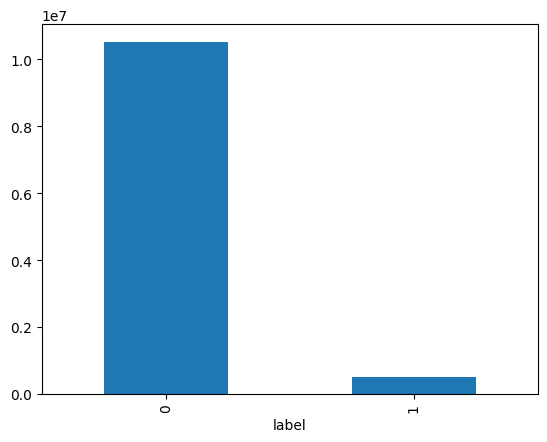

In [30]:
# View distribution of labels 
merged_data['label'].value_counts().plot(kind='bar')

The data is highly imbalanced. given the large size of the data, we may consider to perform undersampling to truncate the label 0 to handle the imbalanced dataset. 

       transcript_position  -1_flank_length  -1_flank_std  -1_flank_mean  \
count         3.657834e+06     3.657834e+06  3.657834e+06   3.657834e+06   
mean          1.296005e+03     8.130966e-03  4.373641e+00   1.114196e+02   
std           1.143172e+03     5.433967e-03  2.572868e+00   1.176711e+01   
min           3.000000e+00     1.660000e-03  1.360000e-01   7.380000e+01   
25%           5.420000e+02     4.320000e-03  2.510000e+00   1.040000e+02   
50%           9.850000e+02     6.640000e-03  3.590000e+00   1.120000e+02   
75%           1.717000e+03     1.030000e-02  5.630000e+00   1.200000e+02   
max           1.873000e+04     1.150000e-01  2.060000e+02   1.520000e+02   

       central_length   central_std  central_mean  +1_flank_length  \
count    3.657834e+06  3.657834e+06  3.657834e+06     3.657834e+06   
mean     8.162806e-03  5.181713e+00  1.114923e+02     7.099949e-03   
std      5.315144e-03  2.993318e+00  1.291745e+01     4.400775e-03   
min      1.660000e-03  2.070000e-01

<Axes: xlabel='label'>

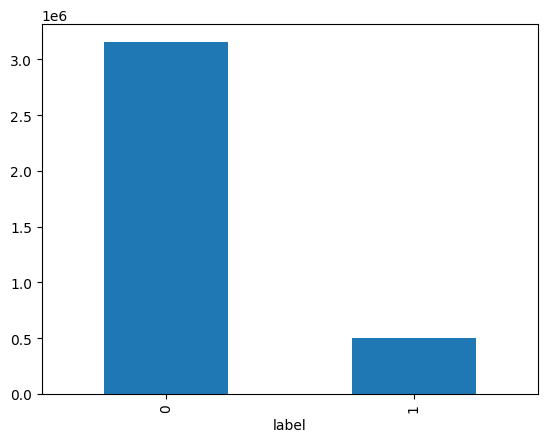

In [31]:
# Calculate the number of negative samples to remove (70% of total negatives)
num_negatives_to_remove = int(0.7 * len(merged_data[merged_data['label'] == 0]))

# Get the indices of negative samples
negative_indices = merged_data.index[merged_data['label'] == 0]

# Randomly select and remove 70% of the negative samples
indices_to_remove = np.random.choice(negative_indices, size=num_negatives_to_remove, replace=False)
df = merged_data.drop(indices_to_remove)

# Reset the index of the DataFrame (optional)
df.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
print(df.describe())
df['label'].value_counts().plot(kind='bar')


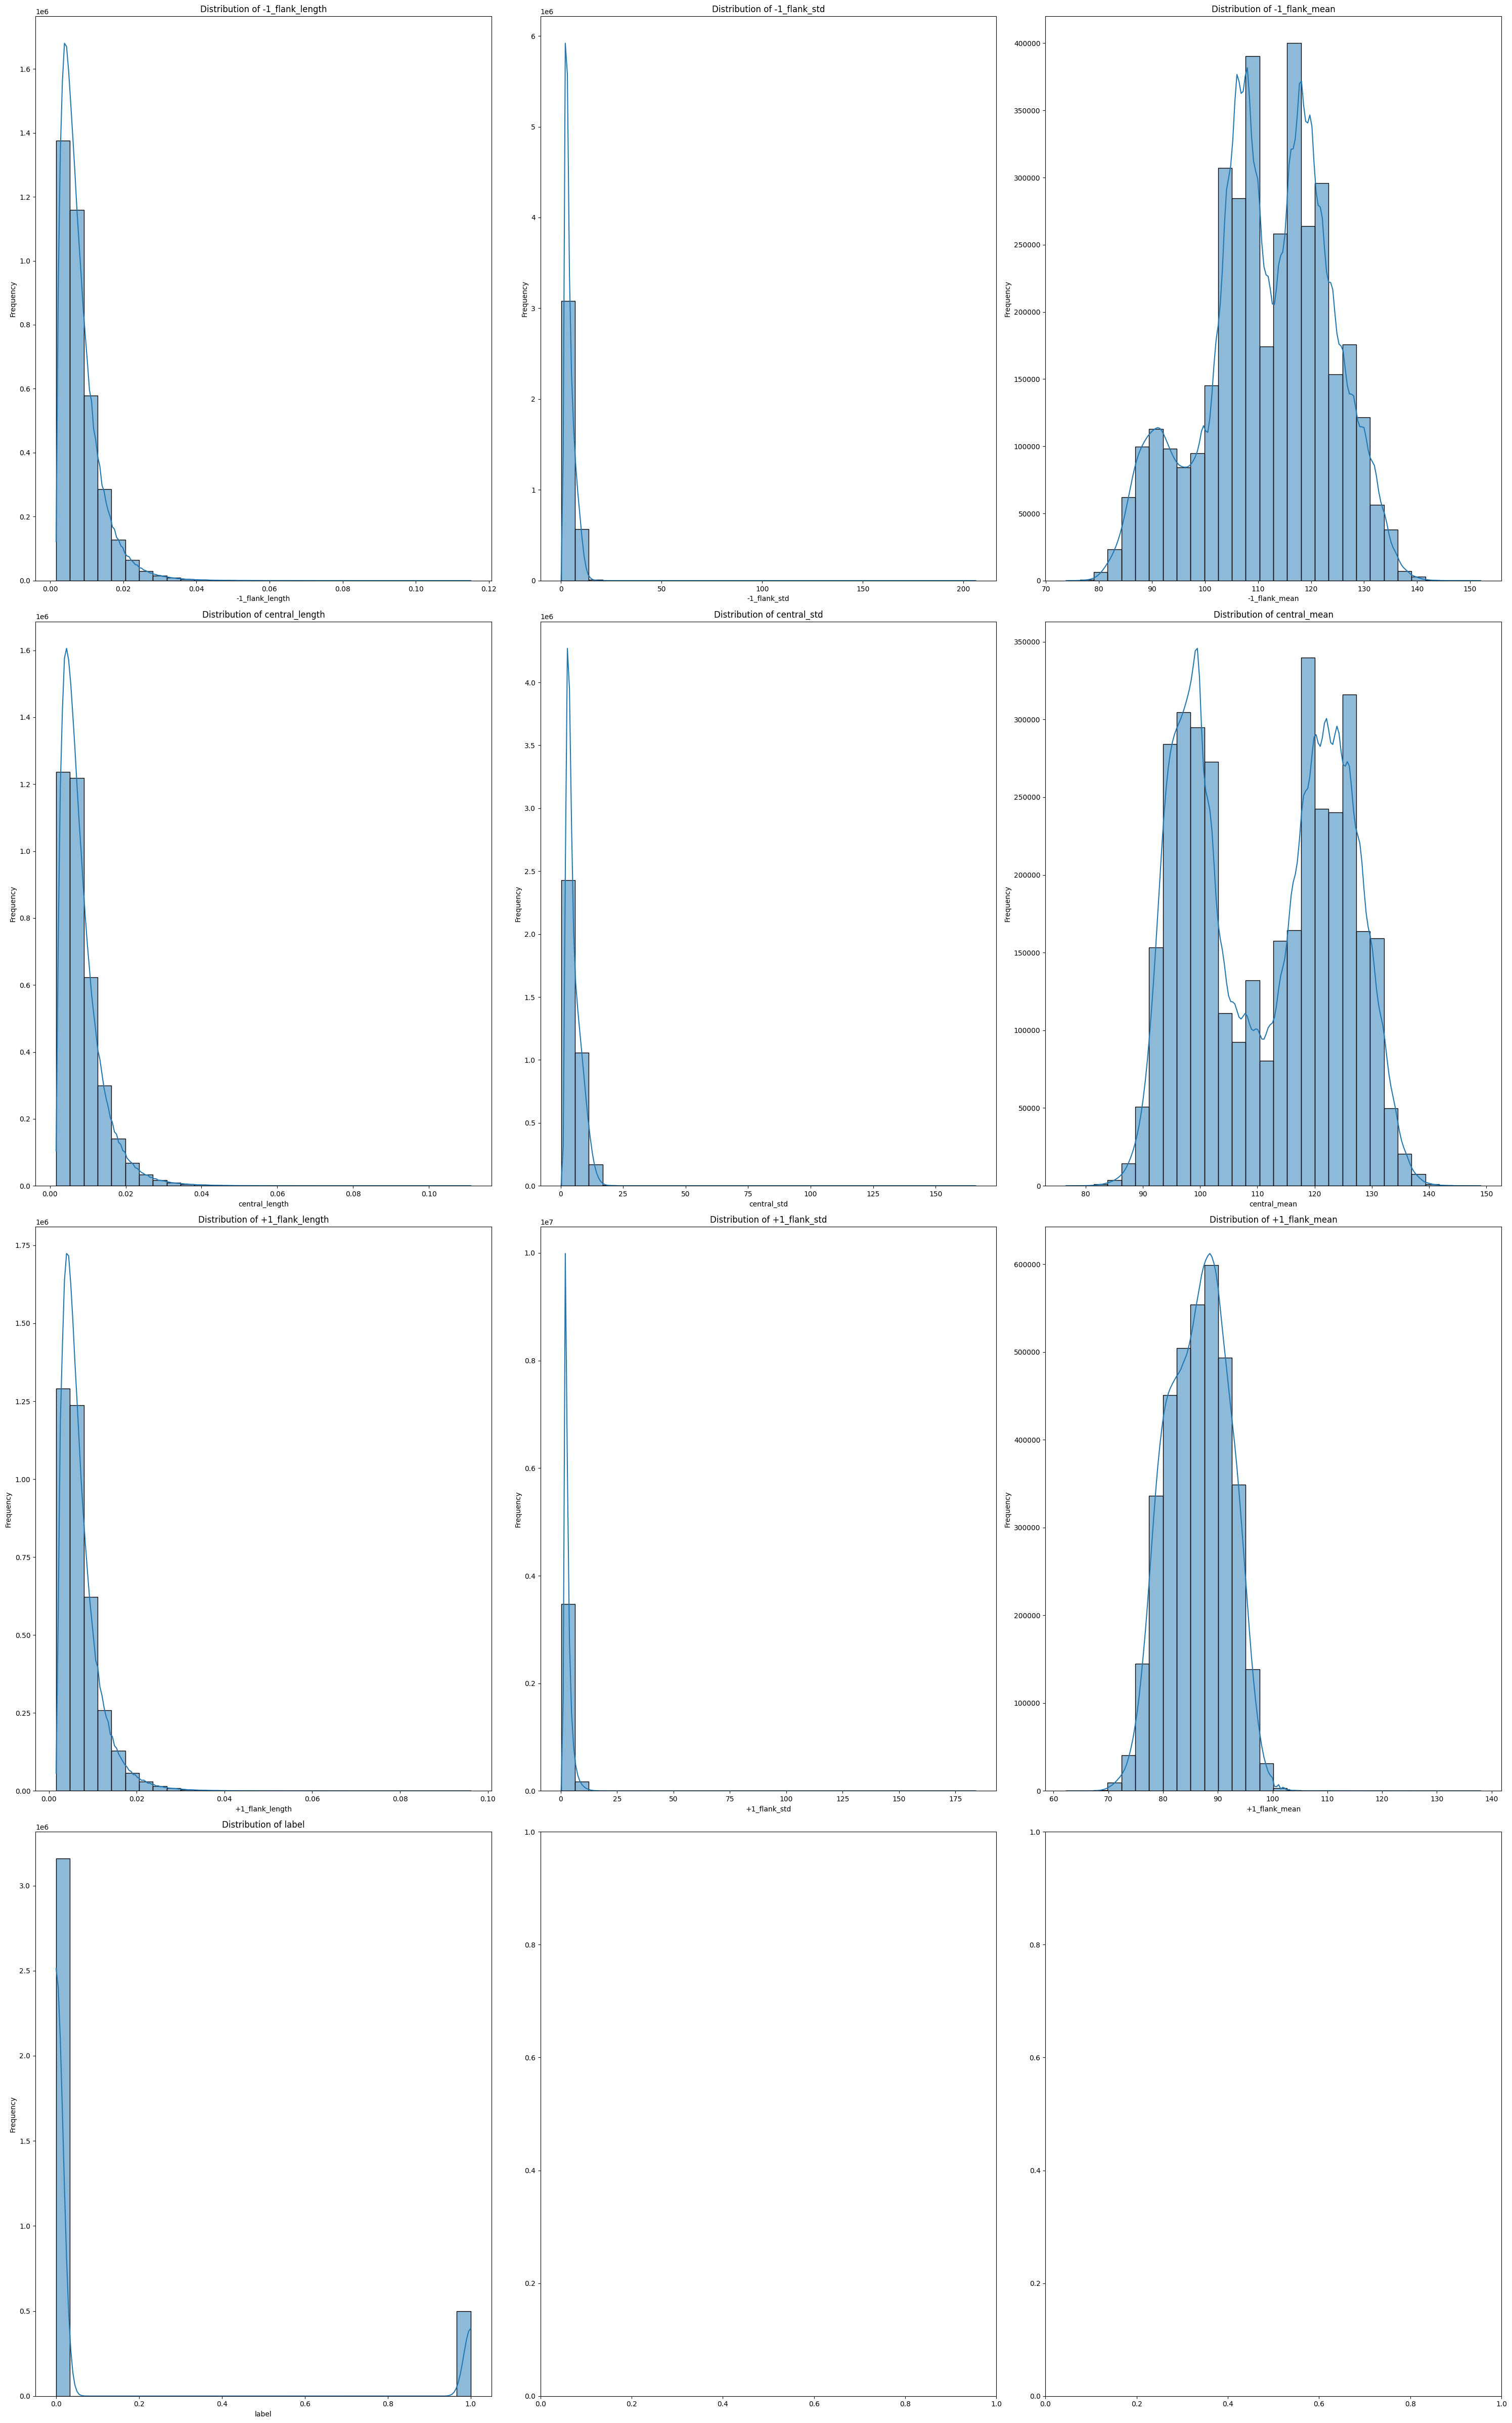

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the columns you want to plot
to_drop = ['gene_id', 'transcript_id', 'transcript_position', 'sequence']
columns_to_plot = pd.read_csv("merged_data.csv").drop(to_drop, axis = 1)
#columns_to_plot = df.columns[3:14]  

# Create subplots for each column
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(30, 48))  

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

# Loop through each numerical column and create a distribution plot
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], ax=axes[i], kde=True, bins=30)  
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    
if len(columns_to_plot) < len(axes):
    for i in range(len(columns_to_plot), len(axes)):
        fig.delaxes(axes[i])
# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


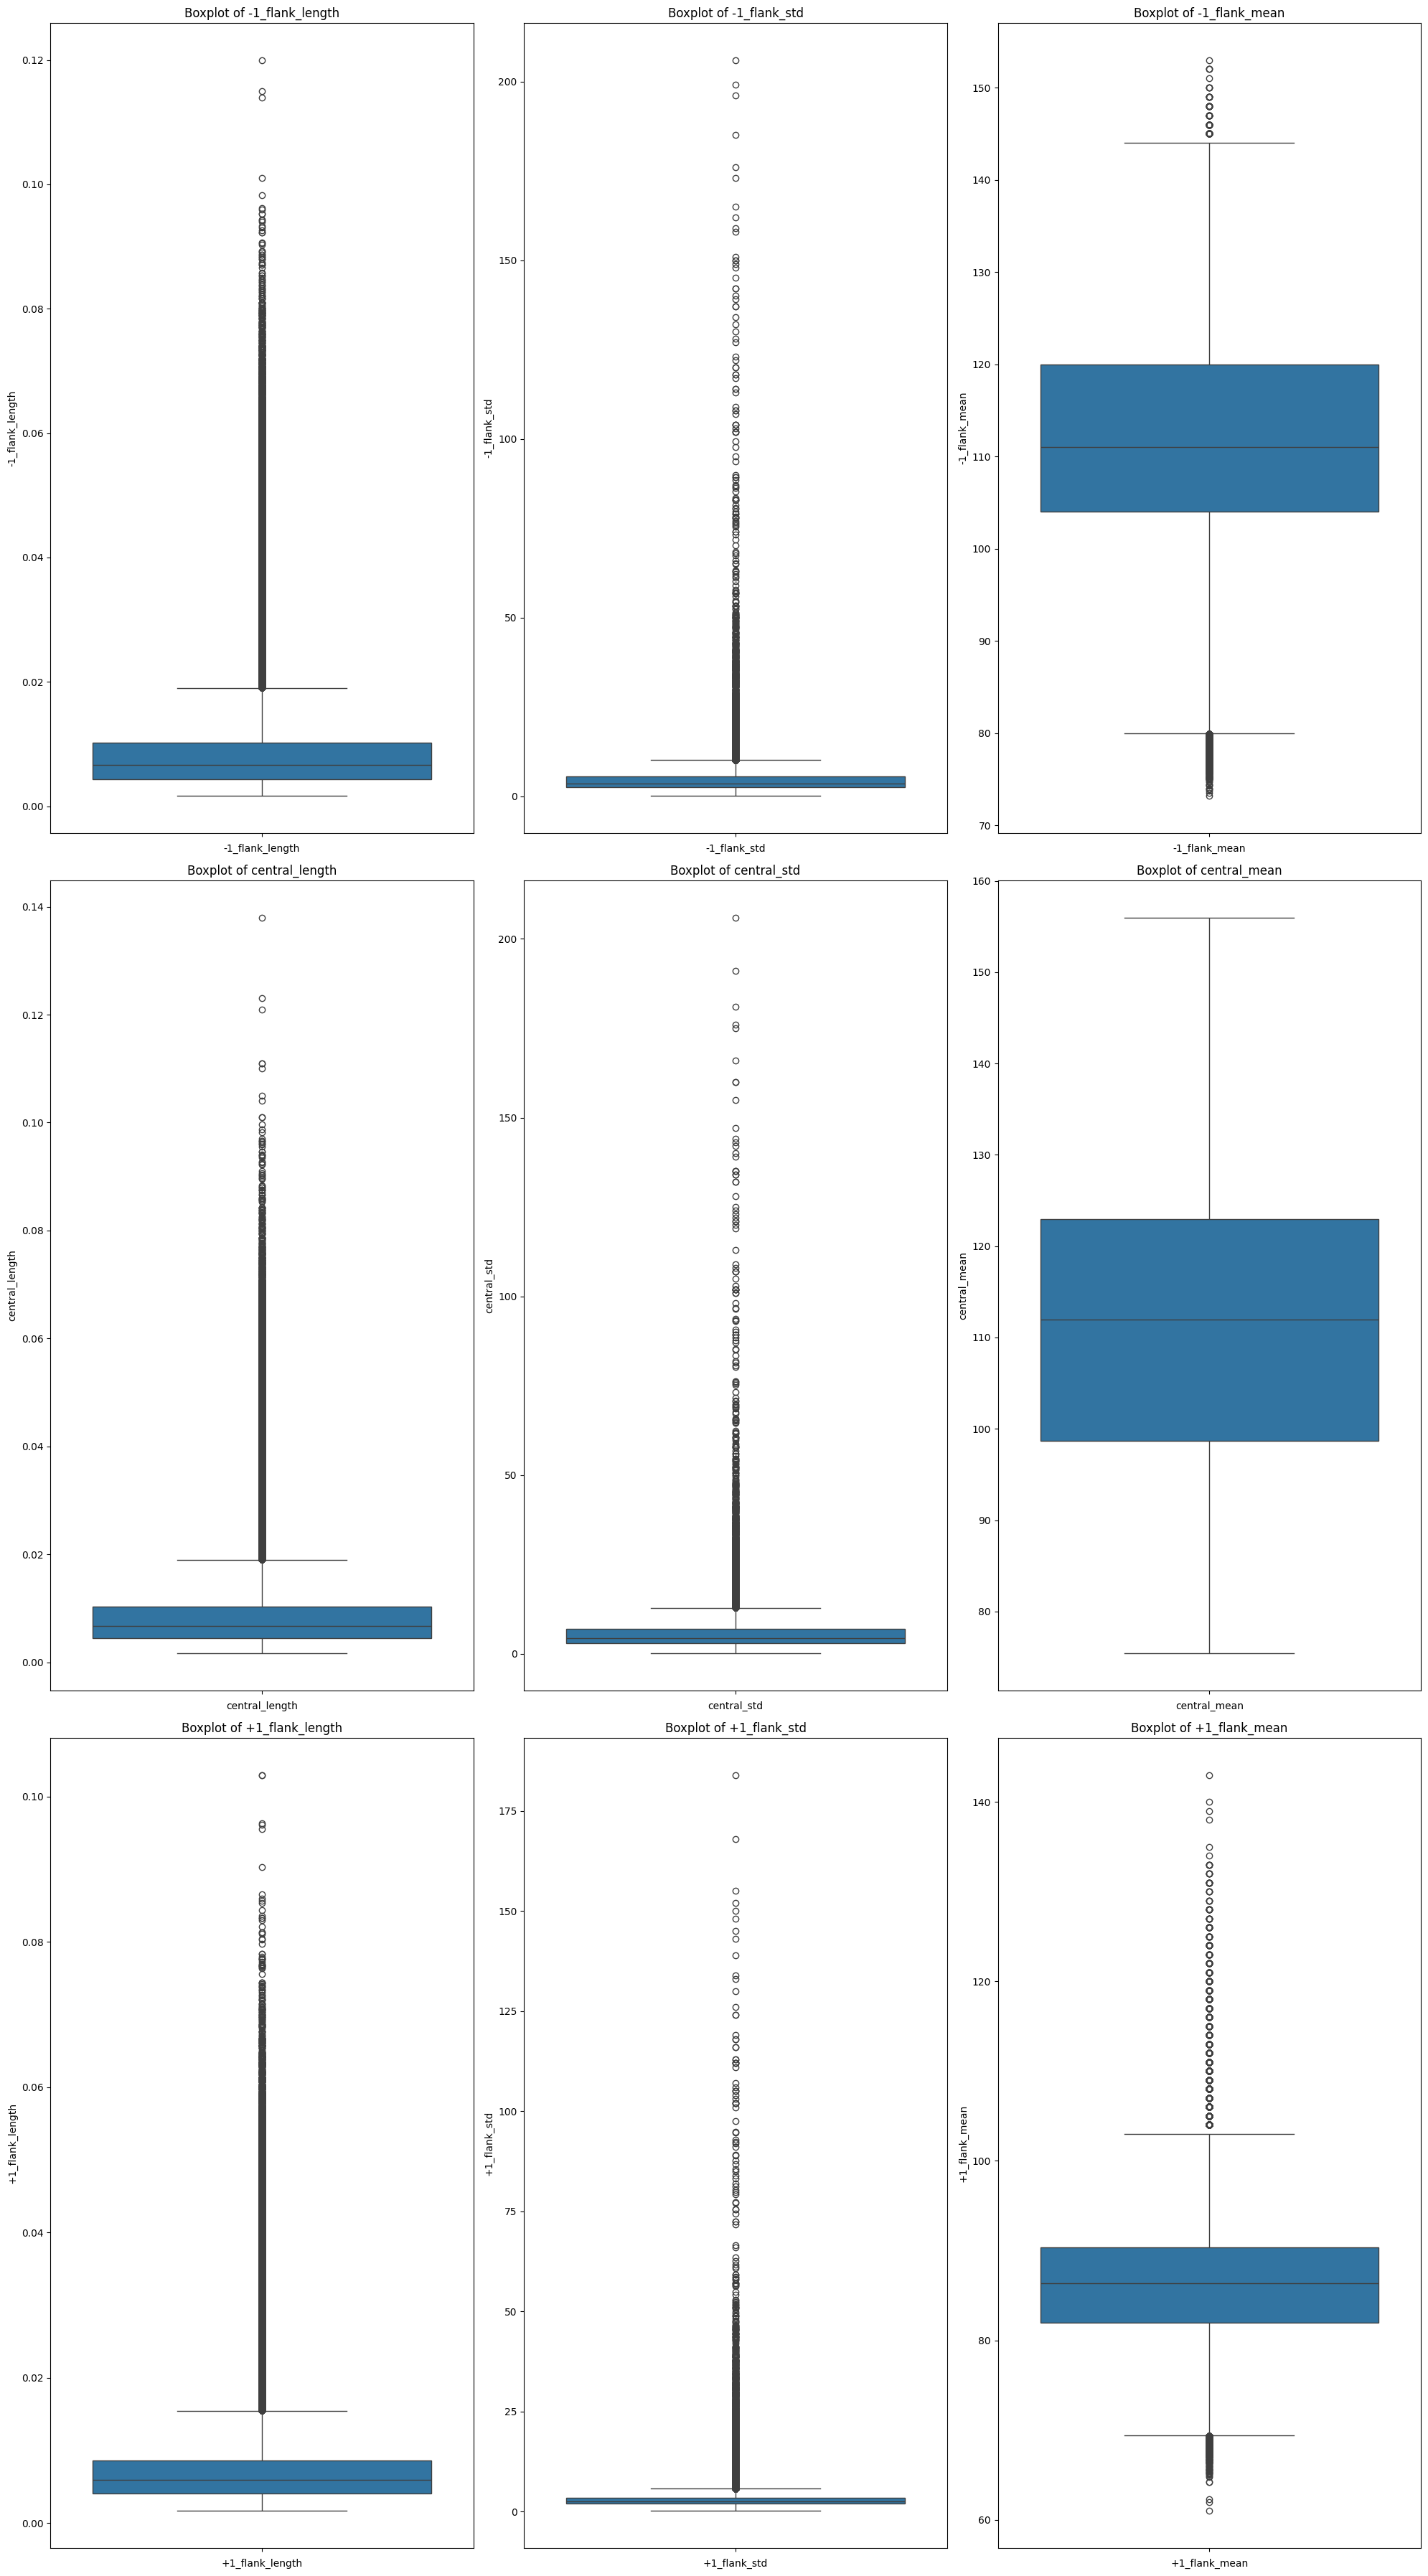

In [49]:

# check for outliers 
# Visualize outliers using boxplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 36))

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

to_drop = ['gene_id', 'transcript_id', 'transcript_position', 'sequence', 'label']
columns_to_plot = pd.read_csv("merged_data.csv").drop(to_drop, axis = 1)

# Loop through each numerical column and create a box plot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=merged_data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()


<Axes: >

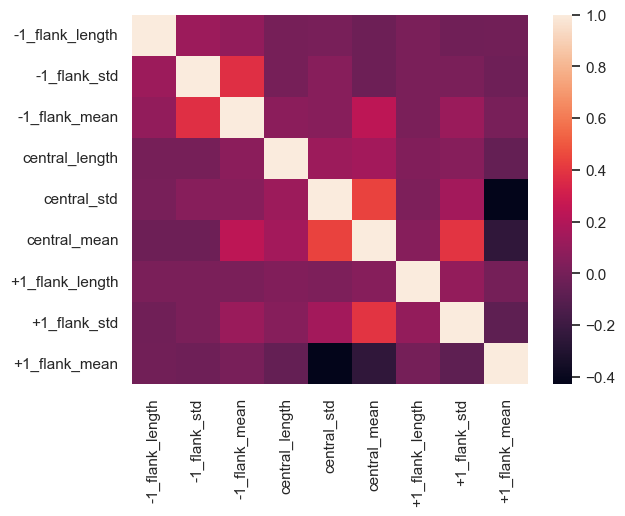

In [51]:
corrMatrix = columns_to_plot.corr()
sns.set(font_scale = 1)
sns.heatmap(corrMatrix)

**TILL HERE !!!!!**

In [ ]:
# Perform PCA reduction 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_data[columns_to_plot])

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Visualize the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1],
            c=merged_data['label'], cmap='rainbow')  # color by 'label' if it's a categorical variable
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result on Data')
plt.colorbar()
plt.show()


As shown by the plot, PCA does not seem to explain the importance of features well as the data are closely packed together. We examine the explained variance ratio above to decide on the number of components. 

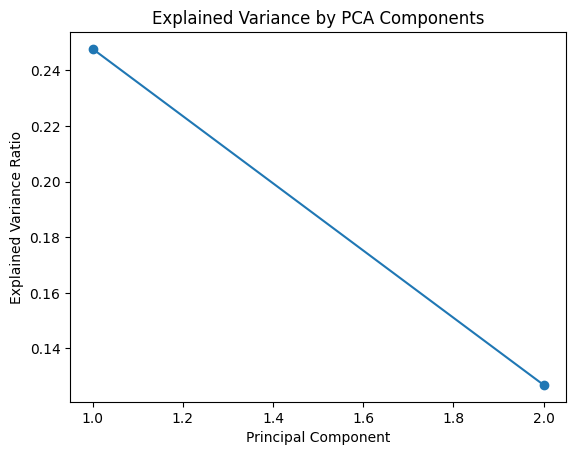

In [ ]:
explained_variance = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance) + 1), explained_variance, '-o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
plt.show()


From the ratio above, we can see that PCA 1 explain about 25% of the features and PCA2 explain less than 14%. Both are not a very high ratio. The first two principal components together only account for ~ 38% of the total variance in the dataset. This means a significant portion of the data's structure (62%) is not represented in these two components. Therefore, reducing the dimensionality of the dataset to just these two components may lose a lot of information.

We are going to perform another round of 5 components and visualise it again. 

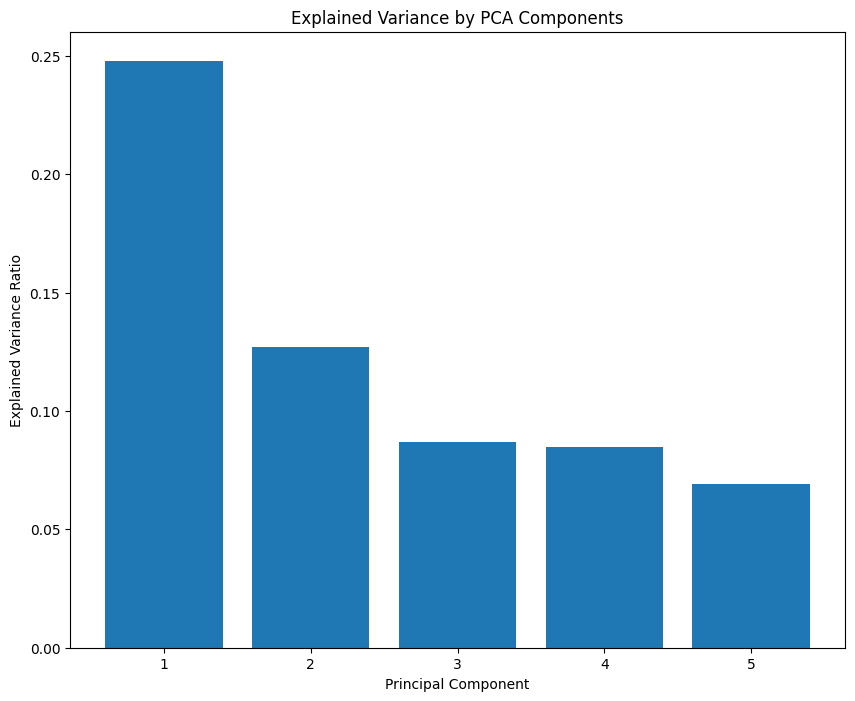

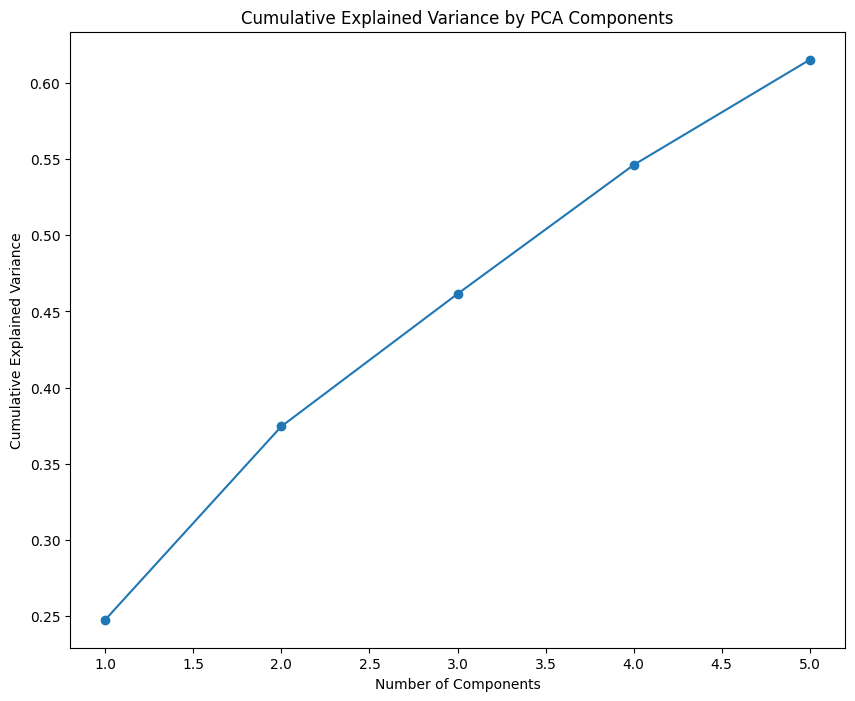

In [ ]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_data[columns_to_plot])

# Apply PCA with 5 components
pca = PCA(n_components=5)
principal_components = pca.fit_transform(scaled_data)

# Visualize the variance explained by each component
explained_variance = pca.explained_variance_ratio_

# Plot the variance explained by each component
plt.figure(figsize=(10, 8))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
plt.show()

# Plot the cumulative variance explained
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), '-o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.show()


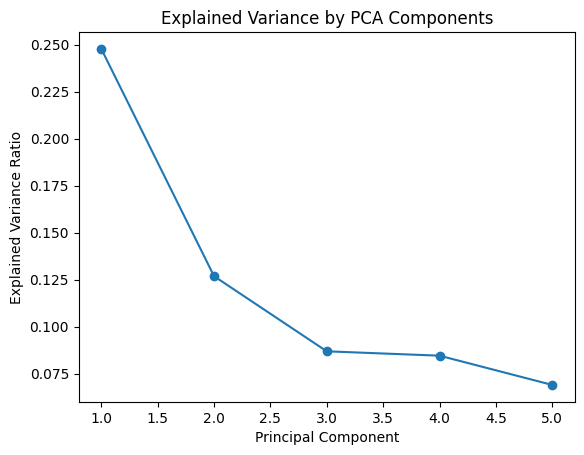

In [ ]:
explained_variance = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance) + 1), explained_variance, '-o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
plt.show()

We can see that with 5 components, we get to explain ~ 60% of the features. The result is in fact not very ideal, (expecting at least 80% of the features being explained) We will reserve the observation and investigate this further if necessary 

Lastly, Instead of using PCA, T-SNE might be a good choice to view high dimension data in low dimension space. 

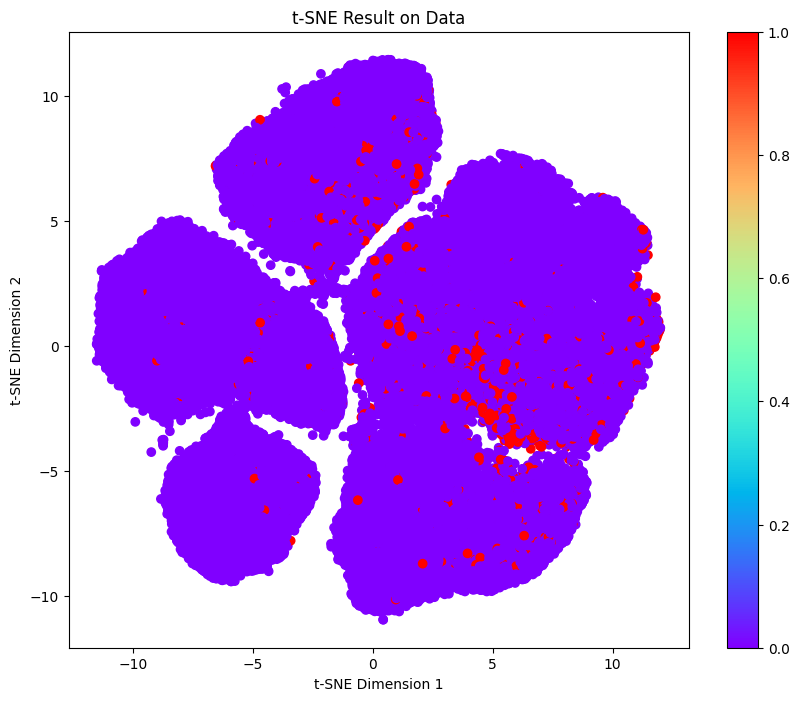

In [ ]:
# T-SNE dimension reduction 
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)  # Adjust parameters for optimal results
tsne_results = tsne.fit_transform(scaled_data)

# Visualize the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], 
            c=merged_data['label'], cmap='rainbow')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Result on Data')
plt.colorbar()
plt.show()


We can see about 5 clusters by using t-SNE. Let's analyse this information further with the help of chatGPT 

In [ ]:
# Assign cluster label using kmeans 
from sklearn.cluster import KMeans

# Using KMeans to cluster the t-SNE results
n_clusters = 5  # Adjust based on visual inspection of your t-SNE plot
kmeans = KMeans(n_clusters=n_clusters)
cluster_labels = kmeans.fit_predict(tsne_results)

# Add the cluster labels to the original dataframe
merged_data['cluster_label'] = cluster_labels


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
print(merged_data['cluster_label'].value_counts())


cluster_label
1    30566
3    27208
4    26546
2    22003
0    15515
Name: count, dtype: int64


In [ ]:
# examine feature distribution 
# For summary statistics
for cluster_num in range(n_clusters):
    print(f"Cluster {cluster_num} Summary:")
    print(merged_data[merged_data['cluster_label'] == cluster_num].describe())
    print("\n")


Cluster 0 Summary:
       transcript_position  1-flank_length_avg  1-flank_std_avg  \
count         15515.000000        15515.000000     15515.000000   
mean           1907.718337            0.006800         2.199240   
std            1447.710607            0.000961         0.517428   
min              15.000000            0.003627         1.361306   
25%             912.000000            0.006131         1.816824   
50%            1595.000000            0.006702         2.076087   
75%            2531.500000            0.007353         2.472488   
max           18730.000000            0.012762         7.992703   

       1-flank_mean_avg  1-flank_length_med  1-flank_std_med  \
count      15515.000000        15515.000000     15515.000000   
mean          93.287182            0.007215         2.631242   
std            7.556886            0.001139         0.682220   
min           80.370000            0.004371         1.441381   
25%           88.288562            0.006435         2.285

In [ ]:
# Example using boxplot for a feature
feature_to_plot = "1-flank_length_avg"  # Choose any feature of interest
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='cluster_label', y=feature_to_plot)
plt.title(f'Distribution of {feature_to_plot} by Cluster')
plt.show()

In [ ]:
# categorical data 
print(merged_data['gene_id'].value_counts())
print(merged_data['transcript_id'].value_counts())
print(merged_data['transcript_position'].value_counts())
print(merged_data['sequence'].value_counts())

gene_id
ENSG00000128050    274
ENSG00000110321    253
ENSG00000164924    250
ENSG00000141367    230
ENSG00000138434    229
                  ... 
ENSG00000153015      1
ENSG00000147853      1
ENSG00000090432      1
ENSG00000214413      1
ENSG00000106605      1
Name: count, Length: 3852, dtype: int64
transcript_id
ENST00000621829    118
ENST00000269122    108
ENST00000378535    107
ENST00000375643    106
ENST00000216277    104
                  ... 
ENST00000608083      1
ENST00000372945      1
ENST00000370087      1
ENST00000370105      1
ENST00000464220      1
Name: count, Length: 5333, dtype: int64
transcript_position
389     90
565     88
420     87
693     87
597     86
        ..
6675     1
4912     1
5174     1
5436     1
5448     1
Name: count, Length: 7099, dtype: int64
sequence
AAAACAA    1359
AGAACAA     954
AAAACAT     914
AAAACTT     902
AAAACTG     893
           ... 
ATAACCG      49
CGAACTA      46
CTAACCG      45
CGAACCG      39
TAGACCG      39
Name: count, Length: 288, 

Noticed that the categorical data is actually not evenly distributed. We have some gene / transcript / even position that is more commonly seen than others. This indicates that we have some more highly expressed gene/transcript. It is possible, that we create some new categorical labels to indicate whether the gene/transcript is active or not 